# ___Обнаружение мусора по фотографиям___

In [1]:

!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 90.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()
!unzip Data.zip -d data

Saving Data.zip to Data.zip
Archive:  Data.zip
  inflating: data/trash_1.jpg        
  inflating: data/trash_2.jpg        
  inflating: data/trash_3.jpg        
  inflating: data/trash_4.jpg        
  inflating: data/trash_5.jpg        
  inflating: data/trash_6.jpg        


In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="iQWleNUHxkrlNJNQx8D3")
project = rf.workspace("image-processing-home-assignment").project("trash-detection-kfzaq")
dataset = project.version(10).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash-Detection-10 in yolov8:: 100%|██████████| 15032/15032 [00:01<00:00, 8736.38it/s] 


In [4]:
!cat Trash-Detection-10/data.yaml

names:
- cardboard
- glass
- metal
- organic waste
- paper
- plastic
nc: 6
roboflow:
  license: CC BY 4.0
  project: trash-detection-kfzaq
  url: https://universe.roboflow.com/image-processing-home-assignment/trash-detection-kfzaq/dataset/10
  version: 10
  workspace: image-processing-home-assignment
test: ../test/images
train: ../train/images
val: ../valid/images


In [6]:
!pip install -q ultralytics

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data="Trash-Detection-10/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Trash-Detection-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f832a76af00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [8]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r runs/detect/train /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



image 1/1 /content/data/trash_4.jpg: 448x640 1 cardboard, 1 organic waste, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


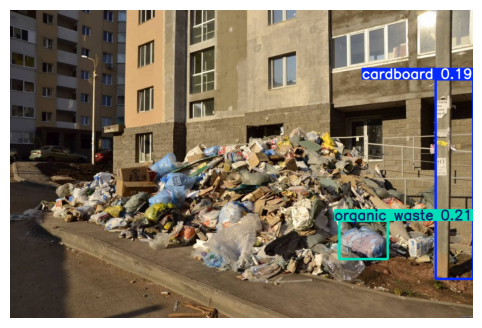

In [ ]:
import matplotlib.pyplot as plt
import cv2

model = YOLO("runs/detect/train/weights/best.pt")

results = model("data/trash_4.jpg", conf=0.09)
img = results[0].plot()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # для коррекции (уменьшения) синего оттенка
plt.figure(figsize=(6, 4))  # задаём меньшие размеры окна
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# validation
val_metrics = model.val(data="Trash-Detection-10/data.yaml", split="val")

# test (финал)
test_metrics = model.val(data="Trash-Detection-10/data.yaml", split="test")

print("VAL mAP@0.5:", val_metrics.box.map50)
print("TEST mAP@0.5:", test_metrics.box.map50)
print("mAP@0.5:0.95:", test_metrics.box.map)
print("Precision:", test_metrics.box.mp)
print("Recall:", test_metrics.box.mr)

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 388.9±110.2 MB/s, size: 21.1 KB)
val: Scanning /content/Trash-Detection-10/valid/labels.cache... 873 images, 549 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 873/873 1.5Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 93, len(boxes) = 819. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 55/55 8.4it/s 6.5s
                   all        873        819      0.695      0.621      0.666      0.577
             cardboard          5          7     0.0763      0.143        0.1     0.0953
                 glass         42         62      0.836      0.902      0.967       0.83
                 metal  